# Business Problem

KBO Marketing Company LLC is a marketing firm.  The firm wants to develop a model that can predict sentiment analysis for technology products such as smartphones.

The company's C-suite executives request their in-house data scientists to develop a prototype.  For the prototype, the in-house data scientists will perform the following:

- Leverage tweets for the Apple and Google brand and its respective products
- Classify sentiment analysis into two groups: *Not Positive* and *Positive*

# Data Understanding

The data for examing the aforementioned problem comes from the following source: [Brands and Product Emotions](https://data.world/crowdflower/brands-and-product-emotions) 

Before beginning to create a model, I want to examine and become familiar with the dataset. I will conduct exploratory data analysis in order to understand the dataset attributes, which includes, but not limited to the following:

1. Number of Columns
2. Number of Rows
3. Column Names
4. Format of the data in each column

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

import nltk
import string
import re
nltk.download('punkt')
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.probability import FreqDist
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


[nltk_data] Downloading package punkt to C:\Users\16467/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\16467/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Reading file

df = pd.read_csv('tweet_product_company.csv')

In [3]:
# Examining first 25 rows

df.head(25)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [4]:
# Examining last 25 rows

df.tail(25)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
8696,&quot;If you were able to afford to attend #s...,NaN,No emotion toward brand or product
8697,@mention you'll be at the google party tonight...,NaN,No emotion toward brand or product
8698,@mention You're not sure how many you ate? Tha...,NaN,No emotion toward brand or product
8699,You know you've made it to #sxsw when you see ...,iPad,Positive emotion
8700,what are your essentials for #SxSW? Mine? poc...,iPad,Positive emotion
8701,@mention your iPhone 4 cases are Rad and Ready...,iPhone,Positive emotion
8702,At #SXSW your iphone charger is your best friend.,NaN,No emotion toward brand or product
8703,At &quot;Your Mom Has an iPad: Designing for B...,NaN,No emotion toward brand or product
8704,At &quot;Your Mom Has an iPad&quot; session #y...,NaN,No emotion toward brand or product
8705,At &quot;Your Mom Has an iPad&quot; session at...,NaN,No emotion toward brand or product


In [5]:
# Getting column info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8720 non-null   object
 1   emotion_in_tweet_is_directed_at                     3169 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB


## Data Overview

I created a Pandas DataFrame from the csv file.  The DataFrame contains 8,721 rows of data.  The DataFrame contains the following columns:

- *df['tweet_text']* - this is the sentiment provided via tweet
- *df['emotion_in_tweet_is_directed_at']* - this is the brand, or product, in which the tweet is targeted
- *df['is_there_an_emotion_directed_at_a_brand_or_product']* - this is the emotional category of the tweet

All of the columns are in string format.

In [6]:
# Obtaining number of unique values for the following column - "df['emotion_in_tweet_is_directed_at']"

df['emotion_in_tweet_is_directed_at'].nunique()

9

In [7]:
# Obtaining Value Counts for the following column - "df['emotion_in_tweet_is_directed_at']"

df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               910
Apple                              640
iPad or iPhone App                 451
Google                             412
iPhone                             288
Other Google product or service    282
Android App                         78
Android                             74
Other Apple product or service      34
Name: emotion_in_tweet_is_directed_at, dtype: int64

## Observations | Brand or Product

I utilized the following code - *df['emotion_in_tweet_is_directed_at'].value_counts()* - to understand the different brands and products that are captured by the respective column.  The different brands and products are the following: 

- *iPad*
- *Apple*
- *iPad or iPhone App*
- *Google*
- *iPhone*
- *Other Google product or service*
- *Android App*
- *Android*
- *Other Apple product or service*

A bar chart that breaks down the different brands and products is listed below.

Text(0.5, 1.0, 'Breakdown of Brand and Product')

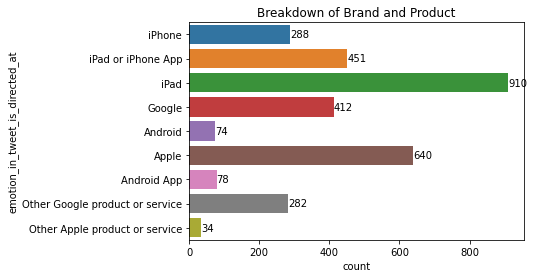

In [8]:
# Creating a Bar Chart of the Different Brands and Products

ax = sns.countplot(y='emotion_in_tweet_is_directed_at', data=df)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                (width, p.get_y() + p.get_height() / 2), 
                ha='left', va='center')  # Align text to the left of the bar and center vertically

plt.title("Breakdown of Brand and Product")

In [9]:
# Obtaining number of unique values for the following column - "df['is_there_an_emotion_directed_at_a_brand_or_product']"

df['is_there_an_emotion_directed_at_a_brand_or_product'].nunique()

4

In [10]:
# Obtaining Value Counts for the following column - "df['is_there_an_emotion_directed_at_a_brand_or_product']"

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5156
Positive emotion                      2869
Negative emotion                       545
I can't tell                           151
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Observations | Brand or Product Sentiment

I utilized the following code - *df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()* - to understand the brand and product sentiment captured by the respective column.  There are a total of four different brand and product sentiments, which are the following:

- *No emotion toward brand or product*
- *Positive emotion*
- *Negative emotion*
- *I can't tell* 

In [11]:
# Examining missing values in each column

df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5552
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

## Observations | Missing Values

I utilized the following code - *df.isna().sum()* - to understand how many missing values are within each column.  There is a total of 5,552 missing values in the *df['emotion_in_tweet_is_directed_at']* column.

There is 1 missing value in the *df['tweet_text']* column.

The other column *df['is_there_an_emotion_directed_at_a_brand_or_product']* did not have any missing values.

In [12]:
# Checking for duplicates

df.duplicated().sum()

22

In [13]:
# Creating a dataframe for the duplicates

duplicates_all = df[df.duplicated(keep=False)]

In [14]:
# Examining the dataframe created for the duplicates

duplicates_all

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion
20,Need to buy an iPad2 while I'm in Austin at #s...,iPad,Positive emotion
21,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
24,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
455,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
457,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
750,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
752,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product


## Observations | Duplicate Rows

I utilized the following code - *df.duplicated().sum()* - to understand how many duplicates are present in the dataset.  There is a total of 22 duplicate rows.

# Data Preparation

The Data Understanding stage is complete.  Based on the exploratory data analysis, I will perform the following:

1. Remove duplicate rows
2. Remove observation that has a missing value in the *df['tweet_text']* column
3. Drop the column *df['emotion_in_tweet_is_directed_at'] from the Dataframe
4. Classify the brand or product sentiment into the two following categories - 1) Not Positive, or 2) Positive - via *df['is_there_an_emotion_directed_at_a_brand_or_product']* column 

## Remove Duplicate Rows

In [15]:
# Checking the number of duplicates

df.duplicated().sum()

22

In [16]:
# Removing duplicates

df.drop_duplicates(inplace=True)

In [17]:
# Checking the number of duplicates again

df.duplicated().sum()

0

In [18]:
# Checking the number of rows in the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8699 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8698 non-null   object
 1   emotion_in_tweet_is_directed_at                     3160 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8699 non-null   object
dtypes: object(3)
memory usage: 271.8+ KB


I utilied the following code - *df.drop_duplicates(inplace=True)* - to remove the duplicates from the DataFrame.  The number of rows is now 8,699.

## Remove Observation with Missing Tweet

In [19]:
# Examining how many Missing Values are in each column

df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5539
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [20]:
# Removing row with missing tweet

df.dropna(subset=['tweet_text'], axis=0, inplace=True)

In [21]:
# Checking whether or not the row with the missing tweet has been removed

df.isna().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5538
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [22]:
# Examining the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8698 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8698 non-null   object
 1   emotion_in_tweet_is_directed_at                     3160 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8698 non-null   object
dtypes: object(3)
memory usage: 271.8+ KB


I utilied the following code - *df.dropna(subset=['tweet_text'], axis=0, inplace=True)* - to remove the observation with the missing tweet from the DataFrame.  The aforementioned observation has been removed.  The number of rows is now 8,698.

## Remove the brand and product column

In [23]:
# Examining the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8698 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8698 non-null   object
 1   emotion_in_tweet_is_directed_at                     3160 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8698 non-null   object
dtypes: object(3)
memory usage: 271.8+ KB


In [24]:
# Remove the df['emotion_in_tweet_is_directed_at'] column

df.drop('emotion_in_tweet_is_directed_at', axis=1, inplace=True)

In [25]:
# Checking whether or not the column has been removed

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8698 entries, 0 to 8720
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8698 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  8698 non-null   object
dtypes: object(2)
memory usage: 203.9+ KB


I utilied the following code - *df.drop('emotion_in_tweet_is_directed_at', axis=1, inplace=True)* - to remove the brand and product column.  The aforementioned column has been removed.

## Classify the brand or product sentiment

In [26]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5142
Positive emotion                      2861
Negative emotion                       544
I can't tell                           151
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [27]:
# Creating a DataFrame that captures the "I can't tell" sentiment

I_cannot_tell = df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == "I can't tell")].index

In [28]:
# Removing rows with a brand / product sentiment that is "I can't tell"

df.drop(I_cannot_tell, inplace=True)

In [29]:
# Checking whether or not the DataFrame no longer captures the "I can't tell" sentiment

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5142
Positive emotion                      2861
Negative emotion                       544
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [30]:
# Replacing 'Positive emotion' with 'Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.replace("Positive emotion", "Positive")

In [31]:
# Checking whether or not 'Positive emotion' is replaced with 'Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5142
Positive                              2861
Negative emotion                       544
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [32]:
# Replacing 'No emotion toward brand or product' with 'Not Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.replace("No emotion toward brand or product", "Not Positive")

In [33]:
# Checking whether or not 'No emotion toward brand or product' is replaced with 'Not Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Not Positive        5142
Positive            2861
Negative emotion     544
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [34]:
# Replacing 'Negative emotion' with 'Not Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.replace("Negative emotion", "Not Positive")

In [35]:
# Checking whether or not 'Negative emotion' is replaced with 'Not Positive'

df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Not Positive    5686
Positive        2861
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

I have reclassified all of the brand and product sentiment into the two following categories - 1) Not Positive, or 2) Positive by performing the following:

- Removing the brand and product sentiment observations that was listed as "I can't tell" (this was 151 rows)
- Reclassifying the brand and product sentiment observations from "Positive emotion" into "Positive" (this was 2,861 rows)
- Reclassifying the brand and product sentiment observations from "No emotion toward brand or product" into "Not Positive" (this was 5,142 rows)
- Reclassifying the brand product sentiment observations from "Negative emotion" into "Not Positive" (this was 544 rows)

A bar chart that provides a breakdown of the new brand and product sentiment is listed below.

Text(0.5, 1.0, 'Breakdown of Brand and Product Sentiment')

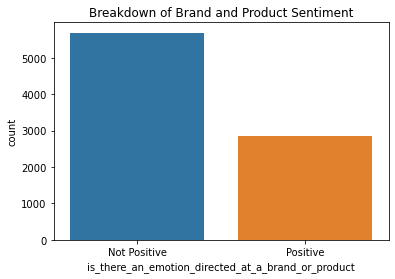

In [36]:
# Create a bar chart for Value Counts of 'Positive' and 'Not Positive'

sns.countplot(x='is_there_an_emotion_directed_at_a_brand_or_product', data=df)

plt.title("Breakdown of Brand and Product Sentiment")

# Modeling

The Data Understanding phase is complete.  I will transition to creating two types of sentiment analysis models - Naive Bayes and Decision Tree.

## Pre-Processing

Before I create any type of sentiment analysis model, I will need to perform natural language pre-processing.  Natural language pre-processing entails the following:

- Tokenization
- Removing capitlization
- Removing punctuation
- Removing stopwords
- Stemming

In [37]:
# Enhancing Stopwords


# Calling English stopwords

stopwords_list = stopwords.words('english')


# Adding punctuation to the stopwords list

stopwords_list += list(string.punctuation)


# Adding numbers '0-9' as strings to the stopwords list

stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# Adding the following words - sxsw, mention, rt, austin, quot, amp, link - to the stopwords list

stopwords_list += ['sxsw', 'mention', 'rt', 'austin', 'quot', 'amp', 'link']


### Enhancing Stopwords List

I enhanced the stopwords list in order to remove words and phrases that do not provide insight to how an individual feels about a brand or product.  The additional words and the reasons for adding them to the stopwords list are the following:

- *sxsw* - this is a reference to the South by Southwest music festival
- *mention* - this word is used to retweet another individual's tweet
- *rt* - this is an abbreviation that represents retweet
- *austin* - this is the city in which South by Southwest takes place
- *quot* - this phrase references a quotation
- *amp* - this phrase references the ampersand sign
- *link* - this word references hyperlink

In [38]:
# Create tokenizer 

# Creating Pattern

pattern = r"([a-zA-Z]+(?:’[a-z]+)?)"

# Creating tokenizer

tokenizer = RegexpTokenizer(pattern)

In [39]:
# Initializing PorterStemmer

stemmer = PorterStemmer()

In [40]:
# Creating a Natural Language Pre-Processing Function

def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    
    # Standardize case (lowercase the text)
    
    text = text.lower()
    
    # Tokenize text using `tokenizer`
    
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords using `stopwords_list`
    
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Stem the tokenized text using `stemmer`
    
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    
    # Return the preprocessed text
    
    return stemmed_tokens

In [41]:
# Test Run of the Natural Language Pre-Processing Function

text = 'I study at the Flatiron School; I am concentrating in Data Science.  I started in 2024.'

preprocess_text(text, tokenizer, stopwords_list, stemmer)


['studi', 'flatiron', 'school', 'concentr', 'data', 'scienc', 'start']

I created a function for performing the natural language pre-processing.  I performed a test run of the aforementioned function on the following text, *I study at the Flatiron School; I am concentrating in Data Science.  I started in 2024.*.  The output of the natural language pre-processing functions are the following stemmed tokens:

- *studi*
- *flatiron*
- *school*
- *concentr*
- *data*
- *scienc*
- *start*

The stemmed tokens are the expected output.  I will proceed with performing a train-test split, and applying the natural language pre-processing function to the X-train and X-test.

In [42]:
# Identifying target variable

X = df['tweet_text']
y = df['is_there_an_emotion_directed_at_a_brand_or_product']


In [43]:
# Performing train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


In [44]:
# Examining X-train

print(X_train[:10])


1790    Keeping tabs on #sxsw via  @mention Awesome iP...
8031    Not to hate on the iPad, but fleets of nerds a...
301     Those who are tweeting that Google is coming o...
451     Before It Even Begins, #Apple Wins #SXSW {link...
792     Google to launch new social network at SXSW? -...
1138    .@mention There's an expectation of engagement...
6005    RT @mention Last day to get the #LP Austin iPh...
4469    Like a venn diagram ? &quot;@mention Google to...
1955    @mention Apple pop-up store at #sxsw was 5 blo...
666     I won the iPad accessories bag! Thanks @mentio...
Name: tweet_text, dtype: object


In [45]:
# Apply Natural Langauge pre-processing function to X-train and X-test

X_train_preprocessed = X_train.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))

X_test_preprocessed = X_test.apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))


In [46]:
# Examining X-train after Natural Langauge pre-processing function is applied

X_train_preprocessed.head()


1790                  [keep, tab, via, awesom, ipad, app]
8031    [hate, ipad, fleet, nerd, arm, ipad, navig, cr...
301     [tweet, googl, come, circl, platform, today, o...
451                              [even, begin, appl, win]
792     [googl, launch, new, social, network, cnet, news]
Name: tweet_text, dtype: object

In [47]:
# Examining X-test after Natural Langauge pre-processing function is applied

X_test_preprocessed.head()


4129    [join, soon, pm, hilton, ab, go, android, deve...
1904              [say, hi, new, iphon, case, zazzlesxsw]
2067    [wonder, sleev, googl, launch, new, social, ne...
462     [even, begin, appl, win, gt, gonna, get, sum, ...
763     [googl, launch, major, new, social, network, c...
Name: tweet_text, dtype: object

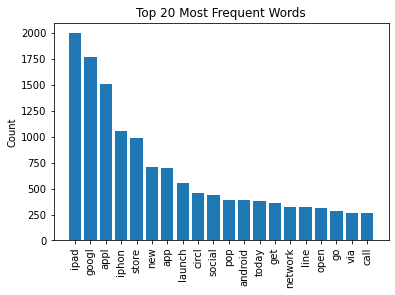

In [48]:
# Creating a plot of the most frequent 20 tokens in the X-train

# Flatten the list of lists into a single list of tokens
all_tokens = [token for sublist in X_train_preprocessed for token in sublist]

# Creating frequency distribution

fdist = FreqDist(all_tokens)
top_20 = list(zip(*fdist.most_common(20)))
tokens = top_20[0]
counts = top_20[1]

# Set up plot and plot data
fig, ax = plt.subplots()
ax.bar(tokens, counts)

# Customize plot appearance
ax.set_title("Top 20 Most Frequent Words")
ax.set_ylabel("Count")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(axis="x", rotation=90)

# Show plot
plt.show()

In [49]:
# Joining the tokens back into strings for each document

# Joining the tokens back into strings for X_train_preprocessed

X_train_preprocessed_joined = [' '.join(doc) for doc in X_train_preprocessed]


# Joining the tokens back into strings for X_test_preprocessed

X_test_preprocessed_joined = [' '.join(doc) for doc in X_test_preprocessed]

## Naive Bayes

Natural language pre-processing of the tweets is complete.  I will transition towards performing the following:

- Vectorizing the data via Term Frequency-Inverse Document Frequency, or TF-IDF
- Creaing a Baseline Naive Bayes model

### Baseline Naive Bayes Model

In [50]:
# Applying vectorization

# Instantiating TF-IDF vectorizer

tfidf = TfidfVectorizer()

# Vectorizing X-train that has undergone Natural Langauge pre-processing

X_train_vectorized = tfidf.fit_transform(X_train_preprocessed_joined)


In [51]:
# Creating Baseline Model via Naive Bayes

# Instantiating Naive Bayes

mnb = MultinomialNB()

# Fitting model to Naive Bayes

mnb.fit(X_train_vectorized, y_train)

MultinomialNB()

In [52]:
# Generating predictions utilizing X-train

y_hat_train_mnb_base = mnb.predict(X_train_vectorized)

In [53]:
# Vectorizing X-test that has undergone Natural Language pre-processing

X_test_vectorized = tfidf.transform(X_test_preprocessed_joined)

In [54]:
# Generating predictions utilizing X-test

y_hat_test_mnb_base = mnb.predict(X_test_vectorized)

In [55]:
# Creating an evaluation metrics function

def evaluation_metrics(y_hat_train_baseline, y_train, y_hat_test_baseline, y_test, pos_label='Positive'):
    
    # Calculate Metrics
    
    train_precision = precision_score(y_train, y_hat_train_baseline, pos_label=pos_label, average='binary', zero_division=0)
    test_precision = precision_score(y_test, y_hat_test_baseline, pos_label=pos_label, average='binary', zero_division=0)

    train_recall = recall_score(y_train, y_hat_train_baseline, pos_label=pos_label, average='binary', zero_division=0)
    test_recall = recall_score(y_test, y_hat_test_baseline, pos_label=pos_label, average='binary', zero_division=0)

    train_accuracy = accuracy_score(y_train, y_hat_train_baseline)
    test_accuracy = accuracy_score(y_test, y_hat_test_baseline)

    train_f1 = f1_score(y_train, y_hat_train_baseline, pos_label=pos_label, average='binary', zero_division=0)
    test_f1 = f1_score(y_test, y_hat_test_baseline, pos_label=pos_label, average='binary', zero_division=0)

    # Print metrics
    
    print('Training Precision:', train_precision)
    print('Testing Precision: ', test_precision)
    print('\n\n')
    print('Training Recall: ', train_recall)
    print('Testing Recall: ', test_recall)
    print('\n\n')
    print('Training Accuracy: ', train_accuracy)
    print('Testing Accuracy: ', test_accuracy)
    print('\n\n')
    print('Training F1-Score: ', train_f1)
    print('Testing F1-Score: ', test_f1)

In [56]:
# Creating confustion matrix function

def cnf_matrix_display(y_test, y_hat_test, title):
    
    # Defining labels for the confusion matrix
    labels = ['Not Positive', 'Positive']

    # Creating the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_hat_test)

    print('Confusion Matrix:\n', conf_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="cividis", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

In [57]:
# Evaulation metrics for Baseline Naive Bayes Model

evaluation_metrics(y_hat_train_mnb_base, y_train, y_hat_test_mnb_base, y_test, pos_label='Positive')

Training Precision: 0.9397727272727273
Testing Precision:  0.7083333333333334



Training Recall:  0.4096087171867261
Testing Recall:  0.20190023752969122



Training Accuracy:  0.791875626880642
Testing Accuracy:  0.7107212475633529



Training F1-Score:  0.5705415660572611
Testing F1-Score:  0.31423290203327175


Confusion Matrix:
 [[1653   70]
 [ 672  170]]


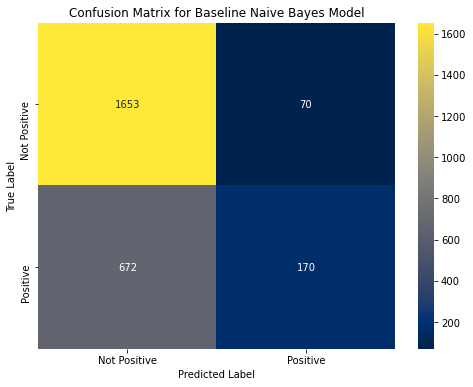

In [58]:
# Creating Confusion Marix for Baseline Naive Bayes Model

cnf_matrix_display(y_test, y_hat_test_mnb_base, title='Confusion Matrix for Baseline Naive Bayes Model')

### Baseline Naive Bayes Model | Conclusion

I have concluded creating a baseline Naive Bayes Model.

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 94.0%
- Recall: 41.0%
- Accuracy: 79.2%
- F1 Score: 57.1%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 70.8%
- Recall: 20.2%
- Accuracy: 71.1%
- F1 Score: 31.4%

This is the initial model for product sentiment analysis.  There is clearly overfitting since the evaluation metrics for the training data are better than the evaluation metrics for the test data.

I also want to point out that precision will be the key evaluation metric.

Accuracy is not appropriate since there is a class imbalance in the population.  It is ideal to improve recall.  However, a false negative is not negatively impactful for a company.  In other words, a false negative states the model identified a customer that provided a *Not Positive* brand or product review.  However, in reality, the customer provided a positive review.

A false positive is more harmful for the brand or product than a false negative.  A false positive states the model identified a customer that provided a *Positive* review.  However, in reality, the customer provide a *Not Positive* review.  In this case, any company does not have the opportunity to intervene and remediate the issue, or issues, that the client has experienced.

As a result, precision is the key evaluation metric.

### Tuning the Baseline Naive Bayes Model

The Baseline Naive Bayes Model has a precision score of approximately 70.8%.  I want to determine whether or not I can tune the model by varying the TF-IDF minimum depth and maximum depth.

I will utilize a pipeline and Grid Search CV to tune the Naive Bayes model.

In [59]:
# Creating a pipeline for tuning the Naive Bayes Model

steps_mnb_tune = [('tfidf', TfidfVectorizer()),
                    ('mnb', MultinomialNB())]

pipe_mnb_tune = Pipeline(steps_mnb_tune) 


In [60]:
# Creating Grid Search for tuning the Naive Bayes Model

# Set Grid for Search

params_mnb_tune = [{'tfidf__min_df': [0.0, 0.01, 0.05],
                     'tfidf__max_df': [1.0, 0.95, 0.9]}]


In [61]:
# Instanstiate grid search object for tuning the Naive Bayes Model

grid_mnb_tune = GridSearchCV(estimator=pipe_mnb_tune, 
                          param_grid=params_mnb_tune, 
                          scoring='precision', 
                          cv=5)


In [62]:
# Fitting the grid search object to data and finding the best model

grid_mnb_tune.fit(X_train_preprocessed_joined, y_train)

best_pipe_mnb_tune = grid_mnb_tune.best_estimator_

In [63]:
# Displaying the best parameters from the grid search object

print(grid_mnb_tune.best_params_)

{'tfidf__max_df': 1.0, 'tfidf__min_df': 0.0}


I have created the pipeline and grid search object.  When I utilized the following code - *grid_mnb_tune.best_params_* - the optimal values are the following:

**TF-IDF Vectorizer**

- max_df: 1.0
- min_df: 0.0

A maximum df of 1 means that the vectorizer is ignoring terms that appear in more than 100% of documents.  This is already the default setting of the TF-IDF vectorizer.

A minimum df of 0.0 means that the vectorizer is not ignoring any terms based on document frequency.

The default setting of the TF-IDF vectorizer minimum df is 1.  A minimum df of 1 means that the vectorizer is including all documents that appear in at least one document.

As a result, a TF-IDF min_df that is equal to 0.0 is not necessarily the same as a TF-IDF min_df that is equal to 1, or the default setting.

In [64]:
# Refitting the best pipeline to the training data

best_pipe_mnb_tune.fit(X_train_preprocessed_joined, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(min_df=0.0)),
                ('mnb', MultinomialNB())])

In [65]:
# Predicting y-train with tuned Naive Bayes model

y_hat_train_mnb_tune = best_pipe_mnb_tune.predict(X_train_preprocessed_joined)

In [66]:
# Predicting y-test with tuned Naive Bayes model

y_hat_test_mnb_tune = best_pipe_mnb_tune.predict(X_test_preprocessed_joined)

In [67]:
# Evaulation metrics for Tuned Naive Bayes Model

evaluation_metrics(y_hat_train_mnb_tune, y_train, y_hat_test_mnb_tune, y_test, pos_label='Positive')

Training Precision: 0.9397727272727273
Testing Precision:  0.7083333333333334



Training Recall:  0.4096087171867261
Testing Recall:  0.20190023752969122



Training Accuracy:  0.791875626880642
Testing Accuracy:  0.7107212475633529



Training F1-Score:  0.5705415660572611
Testing F1-Score:  0.31423290203327175


Confusion Matrix:
 [[1653   70]
 [ 672  170]]


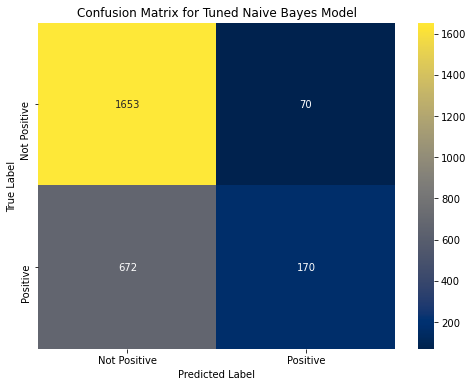

In [83]:
# Creating Confusion Marix for the Tuned Naive Bayes Model

cnf_matrix_display(y_test, y_hat_test_mnb_tune, title='Confusion Matrix for Tuned Naive Bayes Model')

### Tuned Naive Bayes Model | Conclusion

I have completed tuning the Naive Bayes Model.  Evaluation Metrics are below.

**Baseline Naive Bayes Model**

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 94.0%
- Recall: 41.0%
- Accuracy: 79.2%
- F1 Score: 57.1%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 70.8%
- Recall: 20.2%
- Accuracy: 71.1%
- F1 Score: 31.4%

**Tuned Naive Bayes Model**

When the tuned model utilizes the training data, the evaluation metrics are the following:

- Precision: 94.0% 
- Recall: 41.0%
- Accuracy: 79.2%
- F1 Score: 57.1%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 70.8%
- Recall: 20.2%
- Accuracy: 71.1%
- F1 Score: 31.4%

**Conclusions**

The evaluation metrics for the Tuned Naive Bayes model are the same as the Baseline Naive Bayes model.  There was no benefit in attempting to tune the Baseline Naive Bayes model based on the grid search object I created.

I will continue to use the Baseline Naive Bayes model.

## Decision Tree

I have already created a Naive Bayes model to predict customer sentiment analysis.

I am going to explore a different model - a decision tree classifier - to determine whether or not I can predict customer sentiment analysis.

### Baselilne Decision Tree Model

I will start the modeling process by creating a baseline decision tree classifier. I will create the model via ID3 (Iterative Dichotomiser 3).

Afterwards, I will determine whether or not I can improve the classifier by tuning the model performance.

In [69]:
# Creating the Decision Tree classifier, and fitting it on the vectorized training data 

# Instantiating Decision Tree classifier

clf_base = DecisionTreeClassifier(criterion='entropy')

# Fitting Decision Tree classifier on the training data

clf_base.fit(X_train_vectorized, y_train)

DecisionTreeClassifier(criterion='entropy')

In [70]:
# Generating predictions with the training data

y_hat_train_clf_base = clf_base.predict(X_train_vectorized)


In [71]:
# Generating predictions with the test data

y_hat_test_clf_base = clf_base.predict(X_test_vectorized)


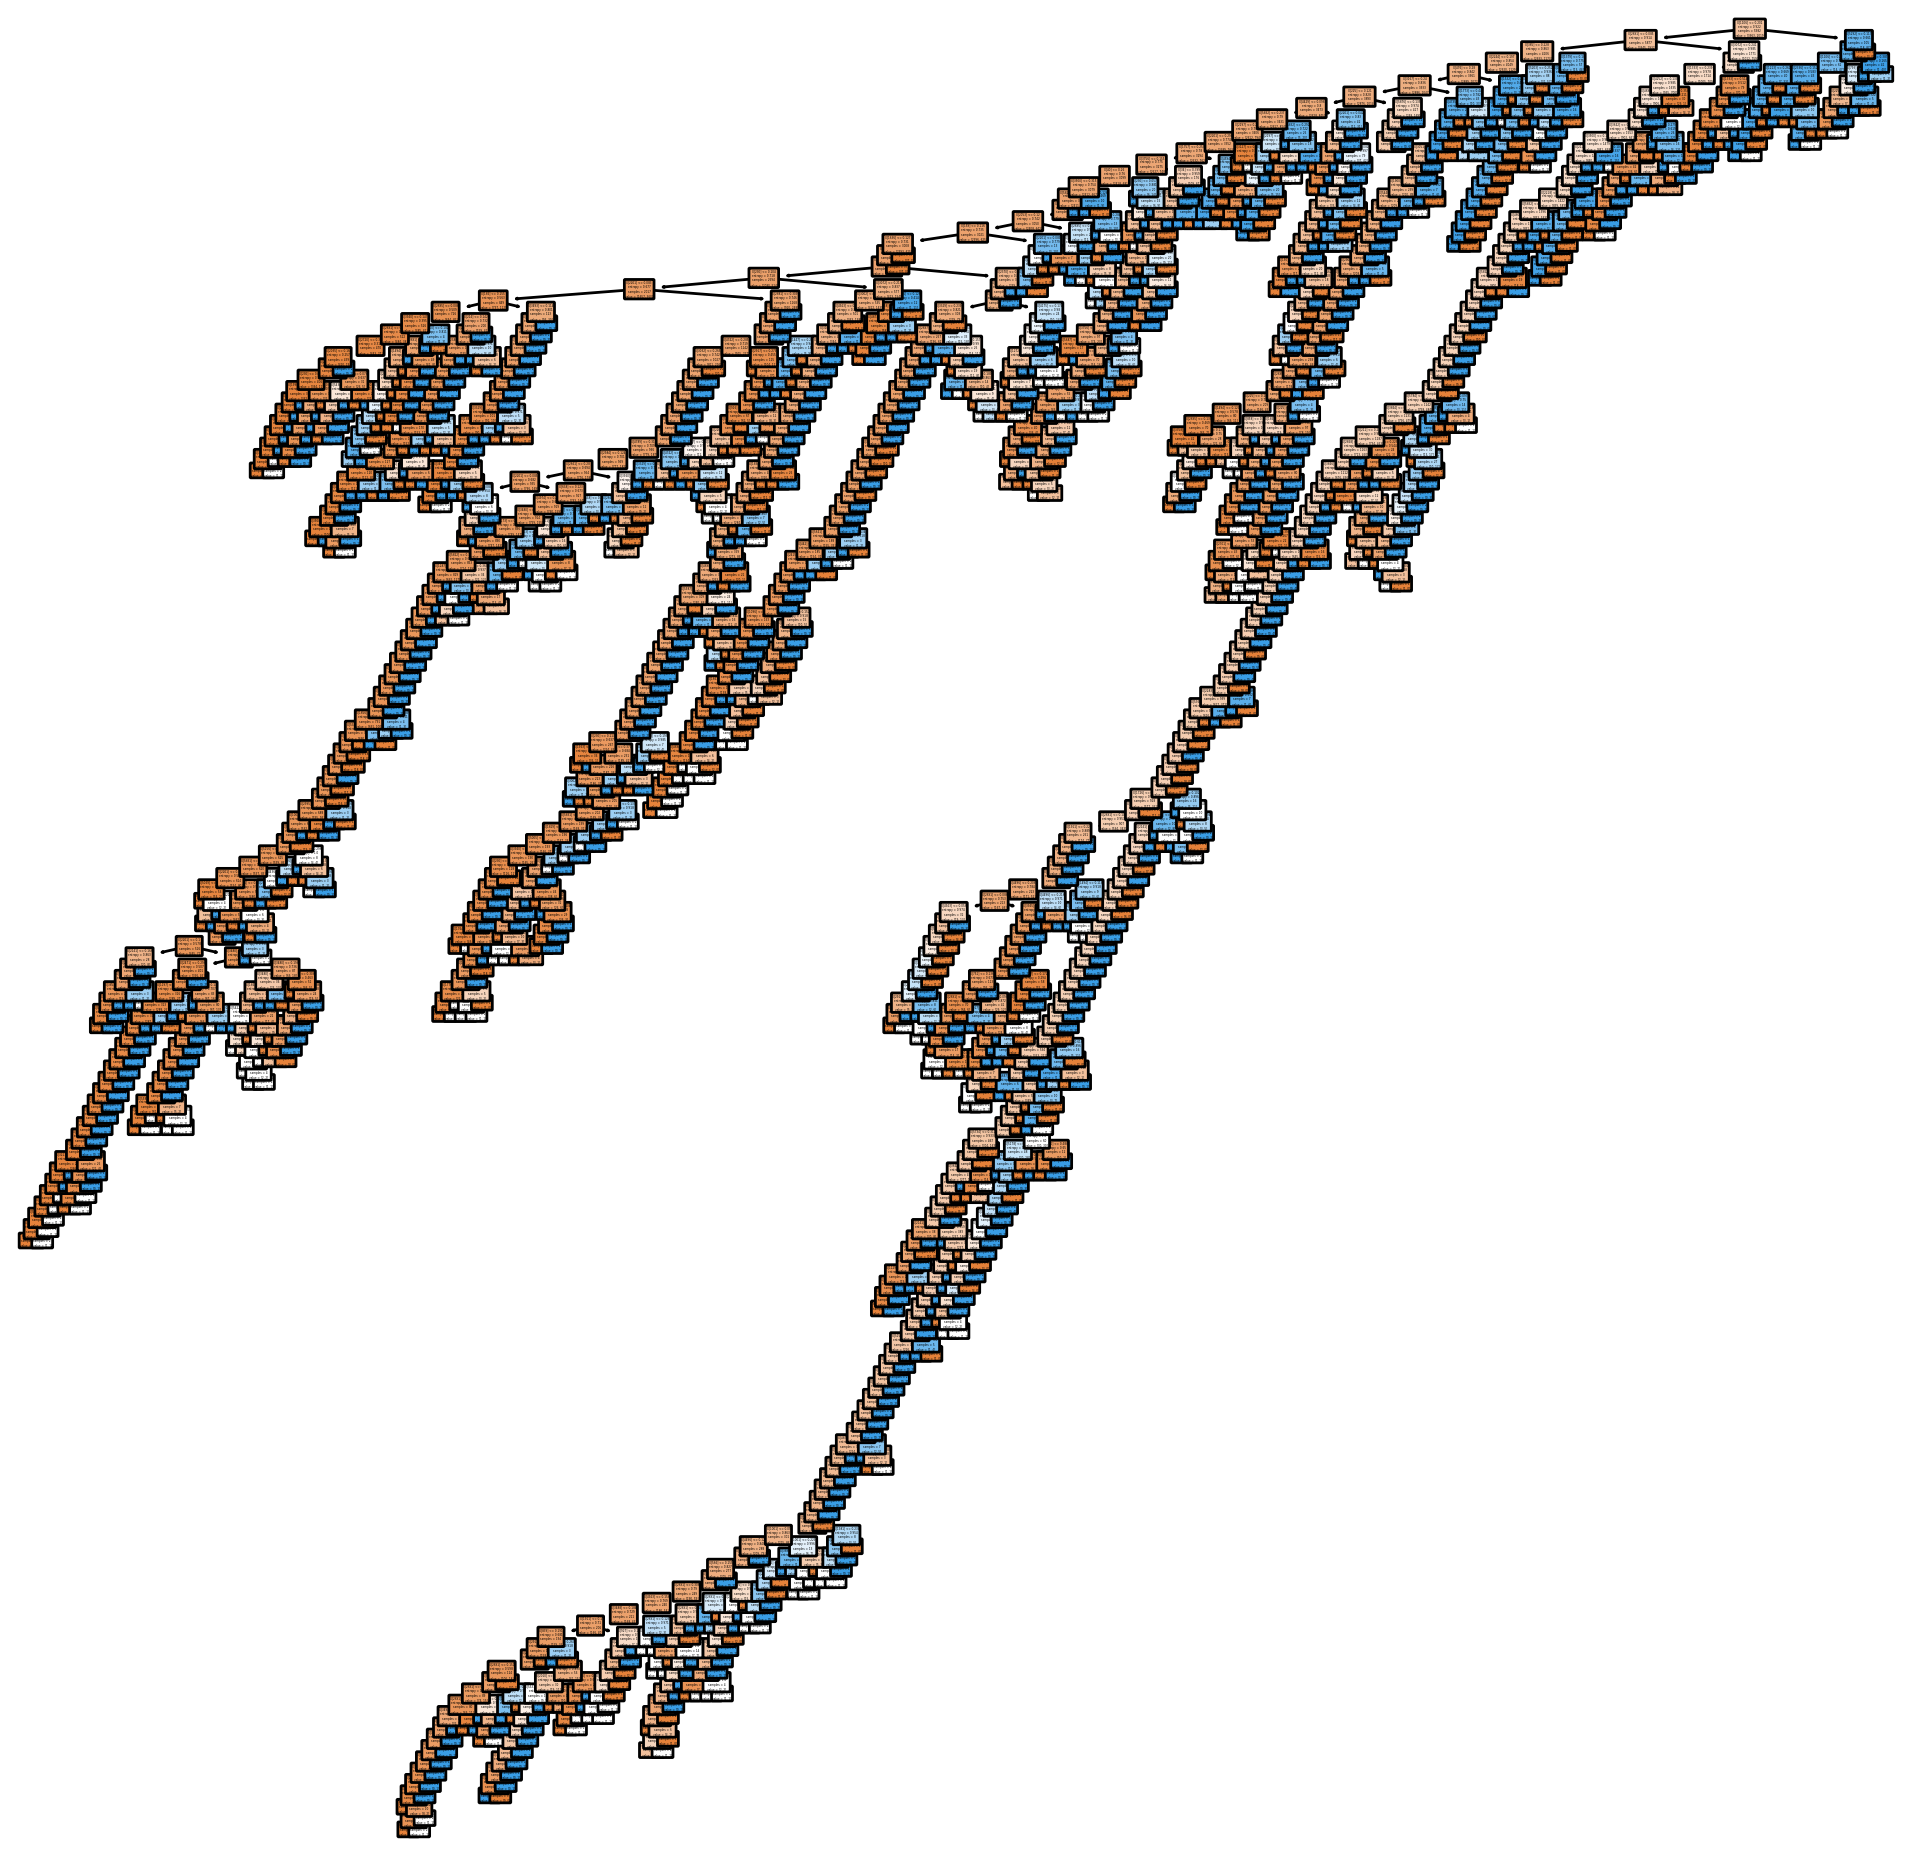

In [72]:
# Creating a decision tree visualization

plt.figure(figsize=(12,12), dpi=200)

tree.plot_tree(clf_base, filled=True, rounded=True)

plt.show()

In [73]:
# Evaluation Metrics for the Baseline Decision Tree 

evaluation_metrics(y_hat_train_clf_base, y_train, y_hat_test_clf_base, y_test, pos_label='Positive')


Training Precision: 0.9919093851132686
Testing Precision:  0.5422818791946309



Training Recall:  0.9108469539375929
Testing Recall:  0.47980997624703087



Training Accuracy:  0.9674022066198595
Testing Accuracy:  0.6962962962962963



Training F1-Score:  0.9496514329976762
Testing F1-Score:  0.5091367359798362


Confusion Matrix:
 [[1382  341]
 [ 438  404]]


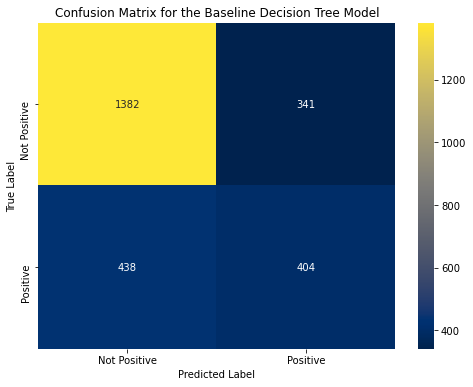

In [74]:
# Creating Confusion Marix for the Baseline Decision Tree Model

cnf_matrix_display(y_test, y_hat_test_clf_base, title='Confusion Matrix for the Baseline Decision Tree Model')


### Baseline Decision Tree Model | Conclusion

I have concluded creating the Baseline Decision Tree Model.

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 99.2%
- Recall: 91.1%
- Accuracy: 96.7%
- F1 Score: 95.0%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 54.2%
- Recall: 49.3%
- Accuracy: 69.7%
- F1 Score: 51.6%

There is overfitting with this model, which is common with decision tree models.  All of the evaluation metrics - precision, recall, accuracy, and F1 score - are above 90% when the training data is utilized.  However, when the test data is utilized, the evaluation metrics range between 40% and 70%.

I will proceed to tune the decision tree classifier.

### Tuned Decision Tree Model

There are multiple variables in which I want to tune the decision tree classifier.  I will currently focus on the following:
    
- Maximum Tree Depth (max_depth) - depth of the decision tree, the maximum number of splits a decision tree can have before continue to grow
- Minimum Sample Split (min_samples_split) - minimum number of samples required to split an internal node
- Minimum Sample Leafs (min_samples_leaf) - minimum number of samples required for a leaf node, or terminal node

**Maximum Tree Depth**

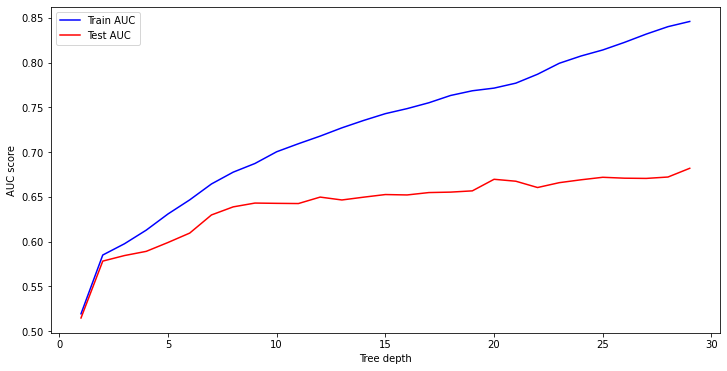

In [75]:
# Max_Depth - Identifying the ideal tree depth

max_depths = list(range(1, 30))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dt.fit(X_train_vectorized, y_train)
    y_hat_train_dt = dt.predict_proba(X_train_vectorized)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_hat_train_dt, pos_label='Positive')
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    
    # Add auc score to previous train results
    train_results.append(roc_auc_dt)
    y_hat_test_dt = dt.predict_proba(X_test_vectorized)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_hat_test_dt, pos_label='Positive')
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    
    # Add auc score to previous test results
    test_results.append(roc_auc_dt)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

The optimal tree depth is approximately 2. After a tree depth of approximately 2, the AUC scores for the train and test data begin to bifurcate.

**Minimum Sample Split**

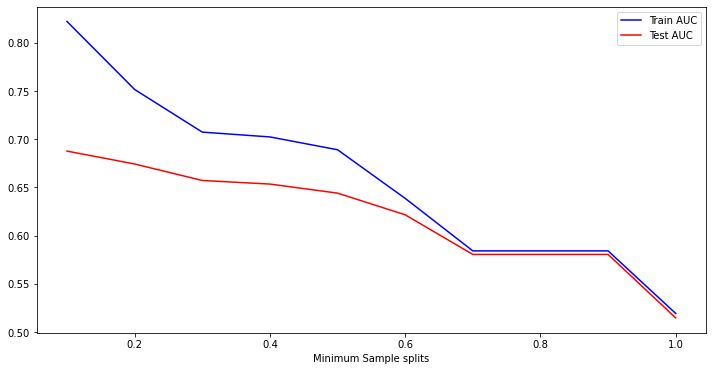

In [76]:
# Min_samples_split - Identifying the optimal minimum samples split

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
    dt.fit(X_train_vectorized, y_train)
    y_hat_train_dt = dt.predict_proba(X_train_vectorized)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_hat_train_dt, pos_label='Positive')
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    
    # Add auc score to previous train results
    train_results.append(roc_auc_dt)
    y_hat_test_dt = dt.predict_proba(X_test_vectorized)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_hat_test_dt, pos_label='Positive')
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    
    # Add auc score to previous test results
    test_results.append(roc_auc_dt)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Minimum Sample splits')
plt.legend()
plt.show()

The optimal minimum sample split is approximately 0.7.  The AUC scores associated with the training data and test data remain converged after a minimum sample split of 0.7; however, the AUC scores also decrease.

**Minimum Sample Leafs**

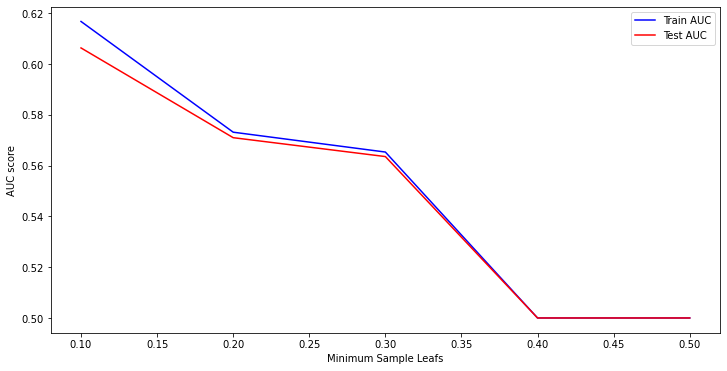

In [77]:
# Min_samples_leaf - Calculating optimal value for minimum sample leafs

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
    dt.fit(X_train_vectorized, y_train)
    y_hat_train_dt = dt.predict_proba(X_train_vectorized)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_hat_train_dt, pos_label='Positive')
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    train_results.append(roc_auc_dt)
    y_hat_test_dt = dt.predict_proba(X_test_vectorized)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_hat_test_dt, pos_label='Positive')
    roc_auc_dt = auc(fpr_dt, tpr_dt)
    test_results.append(roc_auc_dt)
    
plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Minimum Sample Leafs')
plt.legend()
plt.show()

The optimum minimum sample leaf is approximately 0.2.  The AUC scores associated with the training data and test data remain converged after a minimum sample leaf of 0.2; however, the AUC scores also decrease.  

I have found the approximate optimal values for Maximum Tree Depth, Minimum Sample Split, and Minimum Sample Leafs.  I will create a pipeline and grid search cv that will not only incorporate the aforementioned values, but vary the TF-IDF minimum depth, TF-IDF maximum depth, Decision Tree model criterion, and Decision Tree class weight.

In [95]:
# Pipeline

# Creating a pipeline for tuning the Decisiion Tree Model

steps_clf_tune = [('tfidf', TfidfVectorizer()),
                    ('clf', DecisionTreeClassifier())]


pipe_clf_tune = Pipeline(steps_clf_tune) 

In [96]:
# Creating Grid Search for tuning the Decision Tree Model

# Set Grid for Search


params_clf_tune = [{'tfidf__min_df': [0.0, 0.01, 0.05],
                     'tfidf__max_df': [1.0, 0.95, 0.9],
                     'clf__max_depth': [1, 2, 3, 4],
                     'clf__min_samples_split': [0.6, 0.7, 0.8],
                     'clf__min_samples_leaf': [0.15, 0.2, 0.25],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__class_weight': [None, 'balanced']
                   }]


In [97]:
# Instanstiate grid search object for tuning the Decision Tree Model

grid_clf_tune = GridSearchCV(estimator=pipe_clf_tune, 
                          param_grid=params_clf_tune, 
                          scoring='precision', 
                          cv=5)


In [98]:
# Fitting the grid search object to data and finding the best model

grid_clf_tune.fit(X_train_preprocessed_joined, y_train)

best_pipe_clf_tune = grid_clf_tune.best_estimator_


In [99]:
# Displaying the best parameters from the grid search object

print(grid_clf_tune.best_params_)


{'clf__class_weight': None, 'clf__criterion': 'entropy', 'clf__max_depth': 1, 'clf__min_samples_leaf': 0.15, 'clf__min_samples_split': 0.6, 'tfidf__max_df': 1.0, 'tfidf__min_df': 0.0}


I have created the pipeline and grid search object.  When I utilized the following code - *grid_clf_tune.best_params_* - the optimal values are the following:

**TF-IDF Vectorizer**

- max_df: 1.0
- min_df: 0.0

**Decision Tree**

- criterion: entropy
- max_depth: 1
- min_samples_leaf: 0.15
- min_samples_split: 0.6
- class weight: None

In [100]:
# Refitting the tuned Decision Tree Model to the training data

best_pipe_clf_tune.fit(X_train_preprocessed_joined, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(min_df=0.0)),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=1,
                                        min_samples_leaf=0.15,
                                        min_samples_split=0.6))])

In [101]:
# Predicting y-train with the tuned Decision Tree model

y_hat_train_clf_tune = best_pipe_clf_tune.predict(X_train_preprocessed_joined)

In [102]:
# Predicting y-test with tuned Decision Tree model

y_hat_test_clf_tune = best_pipe_clf_tune.predict(X_test_preprocessed_joined)

In [103]:
# Evaulation metrics for Tuned Decision Tree Model

evaluation_metrics(y_hat_train_clf_tune, y_train, y_hat_test_clf_tune, y_test, pos_label='Positive')

Training Precision: 0.0
Testing Precision:  0.0



Training Recall:  0.0
Testing Recall:  0.0



Training Accuracy:  0.6624874623871615
Testing Accuracy:  0.6717348927875244



Training F1-Score:  0.0
Testing F1-Score:  0.0


Confusion Matrix:
 [[1723    0]
 [ 842    0]]


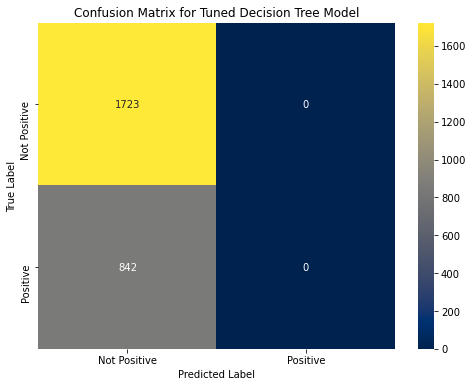

In [104]:
# Creating Confusion Marix for the Tuned Decision Tree Model

cnf_matrix_display(y_test, y_hat_test_clf_tune, title='Confusion Matrix for Tuned Decision Tree Model')

### Tuned Decision Tree Model | Conclusion

I have completed tuning the Decision Tree Model.  Evaluation Metrics are below.

**Baseline Decision Tree Model**

When the baseline model utilizes the training data, the evaluation metrics are the following:

- Precision: 99.2% 
- Recall: 91.1%
- Accuracy: 96.7%
- F1 Score: 95.0%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 54.2%
- Recall: 48.0%
- Accuracy: 69.6%
- F1 Score: 50.9%

**Tuned Decision Tree Model**

When the tuned model utilizes the training data, the evaluation metrics are the following:

- Precision: 0.00% 
- Recall: 0.00%
- Accuracy: 66.2%
- F1 Score: 0.00%

When the baseline model utilizes the test data, the evaluation metrics are the following:

- Precision: 0.00%
- Recall: 0.00%
- Accuracy: 67.2%
- F1 Score: 0.00%

**Conclusions**

The Baseline Decision Tree Model clearly outperforms the Tuned Decision Tree Model.  

The most peculiar observation is that the majority of the training and test evaluation metrics - precision, recall, and F1 score - are zero percent.  Reasons for this peculiar observation are the following:

- Grid Search: Tuning the Decision Tree parameters such as *max_depth*, *min_samples_split*, and * min_samples_leaf* may have created a Decision Tree model that is too complex or too simple.

- Paramter Grid: The overall grid may not be optimal for the given dataset.


# Overall Conclusions and Recommendations